# Practica 5 

##### Nombre: Diana Fernanda Tixi Uyaguari

##### Fecha: 31/05/2022

In [2]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

1. Realice un programa que permita calcular el valor de
Chi-Cuadrada y genere la gráfica de distribución de los
100 primeros números pseudo-aleatorios generados por
los métodos de cuadrados medios y productos medios.


In [1]:
#CHI-CUADRADO
#Funcion para contar los numeros de cada iteracion
def chi_cuadrado(numeros):
    tablas = {}
    #separamos en intervalos de 0.1
    for i in np.arange(0.1, 1.1, 0.1): 
        for j in numeros:
          # Verificamos si el valor esta en el intervalo
            if j > i-0.1 and j <= i: 
                tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
    return tablas
 
#Funcion para aplicar la formula y calcular la desviacion estandar de cada intervalo 
def sumatoria_chi_cuadrado(tabla, E):
    return sum([(valor-E)**2/E for valor in tabla.values()])

Emplee el siguiente nivel de significancia α=0.05. Las semillas para generar los números son las siguientes:
* Cuadrados medios: Xo=74731897457, D=7
* Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
* La gráfica deberá analizar las distribuciones generadas
por ambos métodos y compararlas con la ideal.

In [3]:
# Cuadrados medios: Xo=74731897457, D=7
def cuadrados_medios():
  xo = 74731897457
  digitos = 7
  iteraciones = 100
  xn = xo
  lista1=[]
  #print("It. \t Xn \t Ui \t Rn")
  for i in range(iteraciones):
    xnn = xn**2
    txnn = str(xnn).zfill(8)
    tam = len(txnn)
    ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
    rn = ui / (int('9'*digitos)+1)
    lista1.append(rn)
    xn = ui
  return lista1



In [4]:
#Cuadrados Medios
cm= cuadrados_medios()
t1= chi_cuadrado(cm)
sumatoria1= sumatoria_chi_cuadrado(t1,10)
print("---Cuadrados Medios---")
print("Tabla de conteo")
print(t1)
print("Valor del Chi-cuadrado")
print(sumatoria1)

---Cuadrados Medios---
Tabla de conteo
{0.0: 6, 0.1: 9, 0.2: 10, 0.3: 10, 0.4: 6, 0.5: 12, 0.6: 13, 0.7: 11, 0.8: 7, 0.9: 16}
Valor del Chi-cuadrado
9.200000000000001


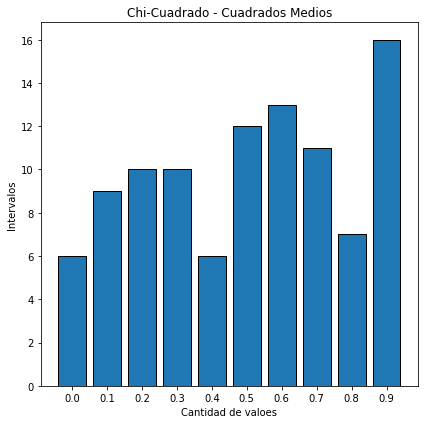

In [8]:
fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1, 1, 1)
axes.bar(range(len(t1)), list(t1.values()), 
          tick_label=list(t1.keys()), 
          edgecolor='black')
axes.set_title('Chi-Cuadrado - Cuadrados Medios')
axes.set_xlabel('Cantidad de valoes')
axes.set_ylabel('Intervalos')

fig.tight_layout()
plt.show()

In [5]:
#CONGRUENCIA LINEAL
# Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
def congruencia_lineal():
  xo = 7
  a = 74731897457
  b = 37747318974
  m = 19
  iteraciones =100
  xn = xo
  lista2=[]
  #print("It. \t Xn \t Ui")
  for i in range(iteraciones):
    xnn = (a*xn+b) % m
    ui = xnn/m
    lista2.append(ui)
    xn = xnn
  return lista2

In [6]:
#Congruencia Lineal
cl= congruencia_lineal()
t2= chi_cuadrado(cl)
sumatoria2= sumatoria_chi_cuadrado(t2,10)
print("---Congruencia Lineal---")
print("Tabla de conteo")
print(t2)
print("Valor del Chi-cuadrado")
print(sumatoria2)

---Congruencia Lineal---
Tabla de conteo
{0.1: 11, 0.3: 22, 0.6: 11, 0.7: 11, 0.8: 23, 0.9: 11}
Valor del Chi-cuadrado
31.7


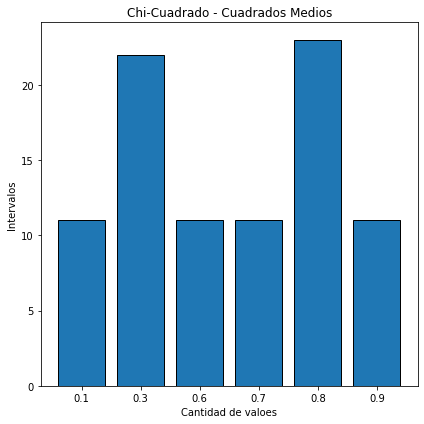

In [9]:
fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1, 1, 1)
axes.bar(range(len(t2)), list(t2.values()), 
          tick_label=list(t2.keys()), 
          edgecolor='black')
axes.set_title('Chi-Cuadrado - Congruencia Lineal')
axes.set_xlabel('Cantidad de valoes')
axes.set_ylabel('Intervalos')

fig.tight_layout()
plt.show()